In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'data\Processed_Train_Data.csv')

In [3]:
df.head()

,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page,Purchase Completed,is_weekend,total_clicks,max_page_reached
0,6,22,21,29,15648,3,88,13,1,2,48,1,2,0,0,84,4
1,5,19,6,29,10018,2,60,13,3,1,57,1,2,0,0,9,2
2,7,15,2,29,19388,3,80,9,5,1,48,1,1,0,0,10,3
3,5,2,2,29,7181,2,45,2,4,1,43,2,1,0,0,6,2
4,6,9,16,29,13493,2,66,9,5,1,57,1,2,0,0,15,2


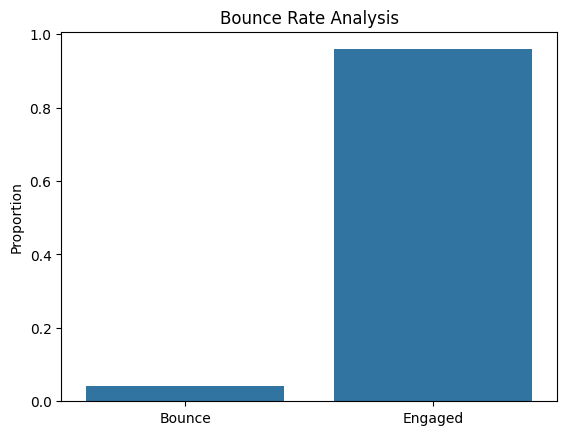

In [5]:
# 1. Advanced Session Analysis (Bounce Rate, Clicks per Session)
bounce_rate = (df['total_clicks'] == 1).mean()

# Bounce Rate Visualization
sns.barplot(x=['Bounce', 'Engaged'], y=[bounce_rate, 1-bounce_rate])
plt.title('Bounce Rate Analysis')
plt.ylabel('Proportion')
plt.show()

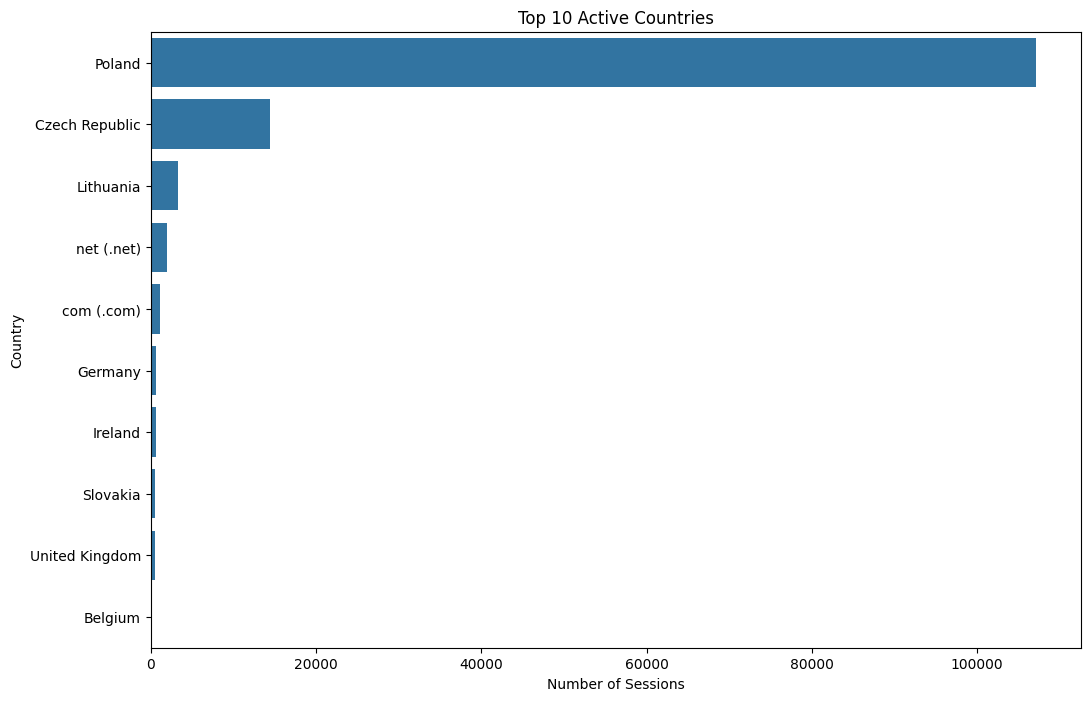

In [14]:
country_labels = {
    1: 'Australia', 2: 'Austria', 3: 'Belgium', 4: 'British Virgin Islands',
    5: 'Cayman Islands', 6: 'Christmas Island', 7: 'Croatia', 8: 'Cyprus',
    9: 'Czech Republic', 10: 'Denmark', 11: 'Estonia', 12: 'Unidentified',
    13: 'Faroe Islands', 14: 'Finland', 15: 'France', 16: 'Germany',
    17: 'Greece', 18: 'Hungary', 19: 'Iceland', 20: 'India',
    21: 'Ireland', 22: 'Italy', 23: 'Latvia', 24: 'Lithuania',
    25: 'Luxembourg', 26: 'Mexico', 27: 'Netherlands', 28: 'Norway',
    29: 'Poland', 30: 'Portugal', 31: 'Romania', 32: 'Russia',
    33: 'San Marino', 34: 'Slovakia', 35: 'Slovenia', 36: 'Spain',
    37: 'Sweden', 38: 'Switzerland', 39: 'Ukraine', 40: 'United Arab Emirates',
    41: 'United Kingdom', 42: 'USA', 43: 'biz (.biz)', 44: 'com (.com)',
    45: 'int (.int)', 46: 'net (.net)', 47: 'org (.org)'
}

# Apply the mapping to the processed DataFrame
df['country_name'] = df['country'].map(country_labels)

# Plot the top 10 active countries
plt.figure(figsize=(12, 8))
sns.countplot(y='country_name', data=df, order=df['country_name'].value_counts().index[:10])
plt.title('Top 10 Active Countries')
plt.xlabel('Number of Sessions')
plt.ylabel('Country')
plt.show()

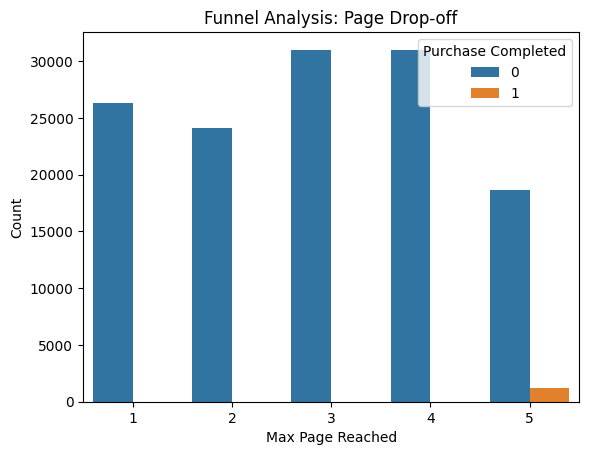

In [8]:
# Funnel Analysis (max_page_reached)
sns.countplot(x='max_page_reached', hue='Purchase Completed', data=df)
plt.title('Funnel Analysis: Page Drop-off')
plt.xlabel('Max Page Reached')
plt.ylabel('Count')
plt.show()

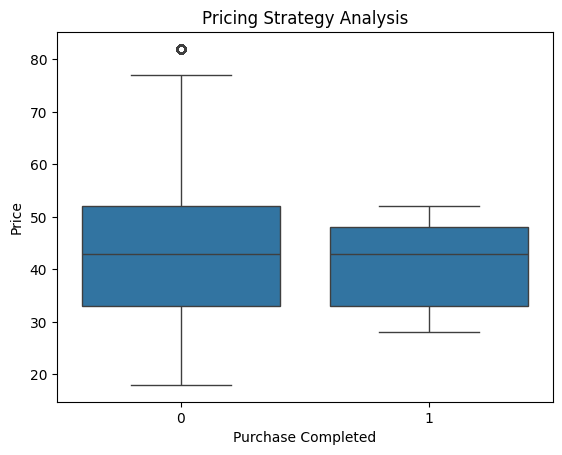

In [9]:
# Pricing strategy vs purchase completion
sns.boxplot(x='Purchase Completed', y='price', data=df)
plt.title('Pricing Strategy Analysis')
plt.xlabel('Purchase Completed')
plt.ylabel('Price')
plt.show()

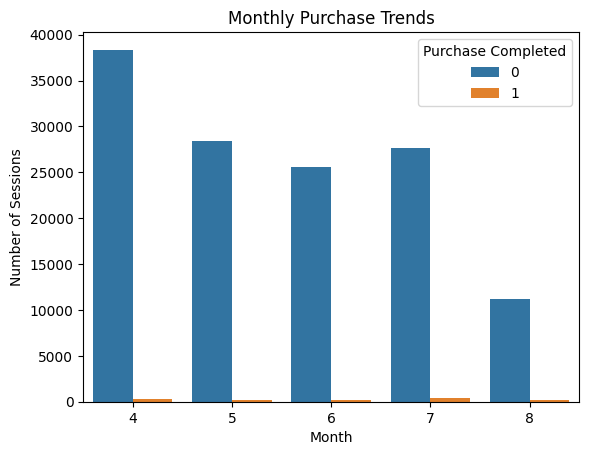

In [10]:
# Day and month trends
sns.countplot(x='month', hue='Purchase Completed', data=df)
plt.title('Monthly Purchase Trends')
plt.xlabel('Month')
plt.ylabel('Number of Sessions')
plt.show()

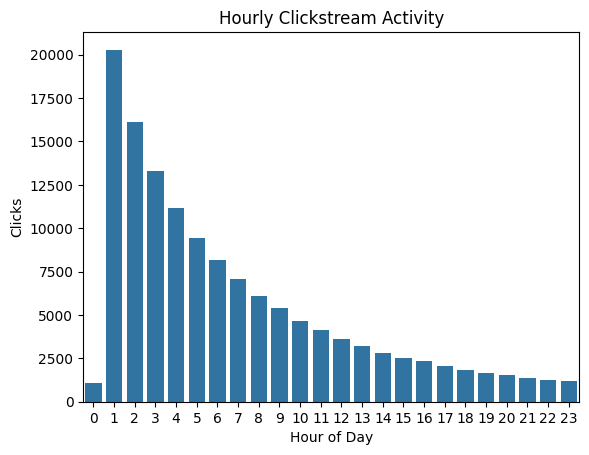

In [11]:
# Hourly Activity (from clicks)
df['hour_of_day'] = df['order'] % 24
sns.countplot(x='hour_of_day', data=df)
plt.title('Hourly Clickstream Activity')
plt.xlabel('Hour of Day')
plt.ylabel('Clicks')
plt.show()

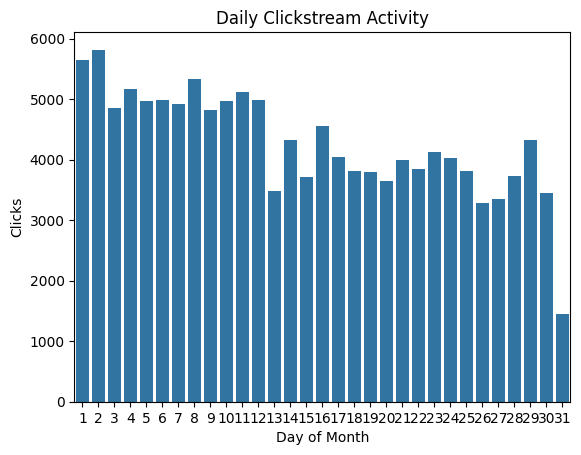

In [12]:
# Day-wise clickstream activity
sns.countplot(x='day', data=df)
plt.title('Daily Clickstream Activity')
plt.xlabel('Day of Month')
plt.ylabel('Clicks')
plt.show()
